In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
# dfo=pd.read_csv(".\data\Oldb\TG_STAID004497.txt",skiprows=19)
df=pd.read_csv(".\data\BerTempH\TG_STAID002759.txt",skiprows=19)


In [3]:
df.rename(columns={' SOUID':'Squid', '    DATE':'Date', '   TG':'TG', ' Q_TG':'Q_TG'},inplace=True)

In [4]:
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')

In [5]:
df.head()

,Squid,Date,TG,Q_TG
0,127488,1876-01-01,22,0
1,127488,1876-01-02,25,0
2,127488,1876-01-03,3,0
3,127488,1876-01-04,-58,0
4,127488,1876-01-05,-98,0


In [6]:
df.tail()

,Squid,Date,TG,Q_TG
52711,111448,2020-04-26,124,0
52712,111448,2020-04-27,151,0
52713,111448,2020-04-28,170,0
52714,111448,2020-04-29,120,0
52715,111448,2020-04-30,137,0


In [7]:
#Squid: Location of weatherstation
# TG : mean temperature in 0.1 
## Q_TG : Quality code for TG (0='valid'; 1='suspect'; 9='missing')


In [8]:
df.shape

(52716, 4)

In [9]:
df.shape[0]/365 #years

144.42739726027398

In [10]:
df.describe()  # TG - 9999

,Squid,TG,Q_TG
count,52716.000000,52716.00000,52716.000000
mean,119453.830943,56.34113,0.033311
std,8024.627964,617.72920,0.546388
min,111448.000000,-9999.00000,0.000000
25%,111448.000000,33.00000,0.000000
50%,111448.000000,93.00000,0.000000
75%,127488.000000,157.00000,0.000000
max,128124.000000,305.00000,9.000000


In [11]:
miss=sum(df['Q_TG']==9)  #missing Data

In [12]:
miss

195

In [13]:
df=df[df.Q_TG!= 9]   # Drop rows by condition

In [14]:
df.shape   #Old Shape : 52716, 4

(52521, 4)

In [15]:
df.describe()

,Squid,TG,Q_TG
count,52521.000000,52521.000000,52521.000000
mean,119424.001676,93.674606,0.000019
std,8024.537076,78.767705,0.004363
min,111448.000000,-226.000000,0.000000
25%,111448.000000,33.000000,0.000000
50%,111448.000000,94.000000,0.000000
75%,127488.000000,157.000000,0.000000
max,128124.000000,305.000000,1.000000


# When we extrapolate the future...

In [28]:
df2=df.set_index('Date').resample('D').interpolate(method='spline',order=3)  #works only with index  
# Methods : Pad  - uses existing values , time - Works on daily and higher resolution data to interpolate given length of interval

In [31]:
df2.describe()

,Squid,TG,Q_TG
count,52716.000000,52716.000000,52716.000000
mean,119453.830909,95.256214,0.000019
std,8024.627930,83.940377,0.004355
min,111448.000000,-226.000000,0.000000
25%,111448.000000,34.000000,0.000000
50%,111448.000000,94.000000,0.000000
75%,127488.000000,158.000000,0.000000
max,128124.000000,796.293343,1.000000


In [32]:
df5=df.set_index('Date').resample('D').interpolate(method='spline',order=1) 

In [47]:
df9=df.set_index('Date').resample('D').interpolate(method='spline',order=4) 

In [33]:
df6=df.set_index('Date').resample('D').interpolate(method='time') 

In [48]:
df6.describe()

,Squid,TG,Q_TG
count,52716.000000,52716.000000,52716.000000
mean,119453.830943,93.620324,0.000019
std,8024.627964,78.626939,0.004355
min,111448.000000,-226.000000,0.000000
25%,111448.000000,34.000000,0.000000
50%,111448.000000,93.000000,0.000000
75%,127488.000000,157.000000,0.000000
max,128124.000000,305.000000,1.000000


# Misc

In [19]:
df2.reset_index(level=0, inplace=True)
start=df2['Date'].min()
end=df2['Date'].max()
timedelta=end-start

# Binning and Names

In [45]:
df2['Day']=df['Date'].dt.day_name()

# Binning
# bins=(305.0,157.0,94.0,33.0,-50.0,-120.0)
# bin_names=['hot','average','cooling','fresh','cold','really cold']
# df2['TG']=pd.cut(df2['TG'],bins=bins,labels=bin_names)


# Plotting

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set the size of the matplotlib.figure to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

In [22]:
def plot_ts(series, plot_title, hline=0, plot_hline=False):
    '''
    Plots the specified pd.DataFrame or pd.Series with the given title.
    
    Parameters:
    -----------
    
    series:     time series to plot
    plot_title: title of the plot
    hline:      y value at which to plot a horizontal line
    plot_hline: plots a horizontal line at hline if True, otherwise not
    '''
    series.plot()
    plt.title(plot_title, fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('y-values', fontsize=12)
    if plot_hline:
        plt.axhline(hline, c='r')
    plt.show()

In [23]:
# Combine them into a DataFrame
plotter2 = pd.DataFrame({'x':df2.Date, 'y':df2.TG})
plotter2.set_index('x', inplace=True)

plotter2.head()


,y
x,
1876-01-01,22.0
1876-01-02,25.0
1876-01-03,3.0
1876-01-04,-58.0
1876-01-05,-98.0


In [49]:
plotter9 = pd.DataFrame({'x':df9.Date, 'y':df9.TG})
plotter9.set_index('x', inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [43]:
df6.reset_index(level=0, inplace=True)
plotter6 = pd.DataFrame({'x':df6.Date, 'y':df6.TG})
plotter6.set_index('x', inplace=True)


plotter3.head()


,y
x,
1876-01-01,22.0
1876-01-02,25.0
1876-01-03,3.0
1876-01-04,-58.0
1876-01-05,-98.0


In [51]:
df9.reset_index(level=0, inplace=True)
plotter9 = pd.DataFrame({'x':df9.Date, 'y':df9.TG})
plotter9.set_index('x', inplace=True)


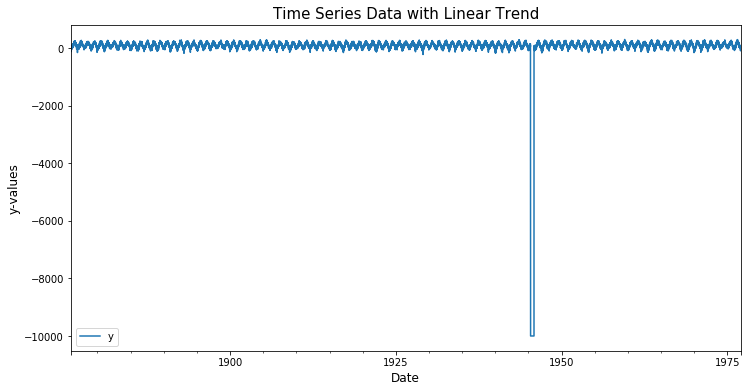

In [24]:
# Without Interpolation, Raw Data
df4=pd.read_csv(".\data\BerTempH\TG_STAID002759.txt",skiprows=19)
df4.rename(columns={' SOUID':'Squid', '    DATE':'Date', '   TG':'TG', ' Q_TG':'Q_TG'},inplace=True)
df4['Date'] = pd.to_datetime(df4['Date'].astype(str), format='%Y%m%d')

uninterpolated= pd.DataFrame({'x':df4.Date, 'y':df4.TG})
uninterpolated.set_index('x', inplace=True)

## Look at time series data with a linear trend

plot_ts(uninterpolated['1876-01':'1976-12'], 'Time Series Data with Linear Trend')


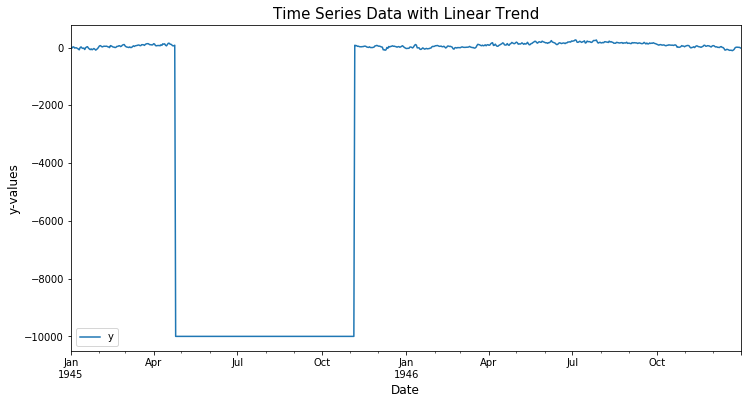

In [27]:
plot_ts(uninterpolated['1945':'1946-12'], 'Time Series Data with Linear Trend')

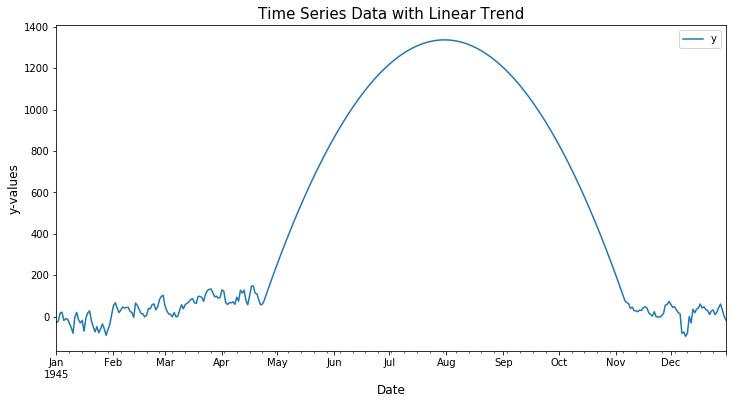

In [29]:
plot_ts(plotter2['1945':'1945-12'], 'Time Series Data with Linear Trend')

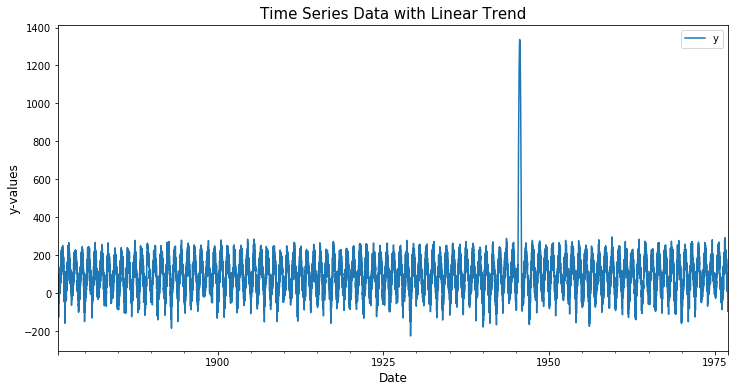

In [30]:
## Look at time series data with a linear trend

plot_ts(plotter2['1876-01':'1976-12'], 'Time Series Data with Linear Trend')     # 2nd Order Spline

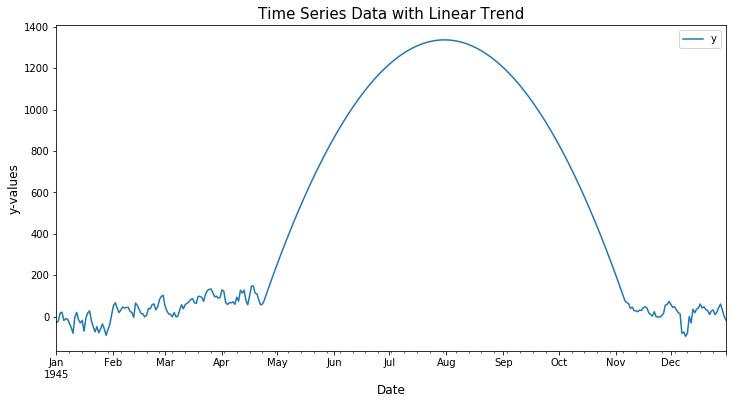

In [26]:
plot_ts(plotter2['1945':'1945-12'], 'Time Series Data with Linear Trend')   # Spline 2nd Order

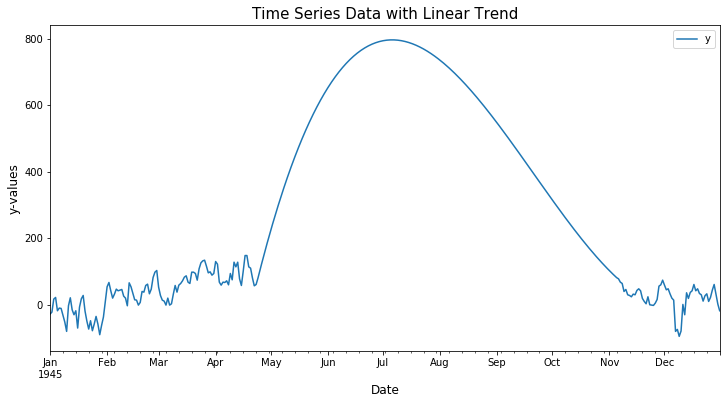

In [42]:
plot_ts(plotter3['1945':'1945-12'], 'Time Series Data with Linear Trend')    # Spline 3 Order

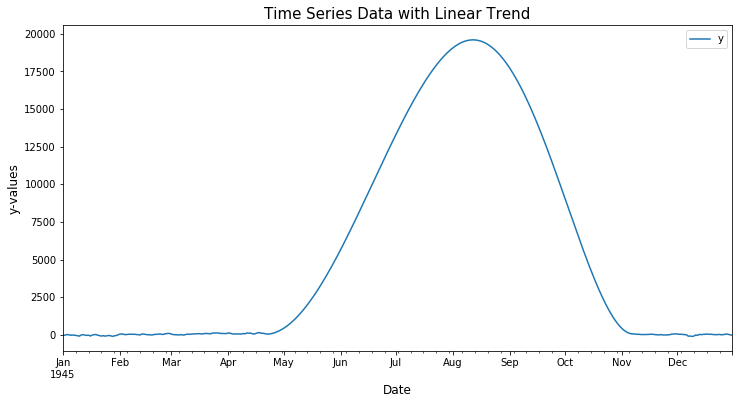

In [52]:
plot_ts(plotter9['1945':'1945-12'], 'Time Series Data with Linear Trend')    # Spline 4 Order

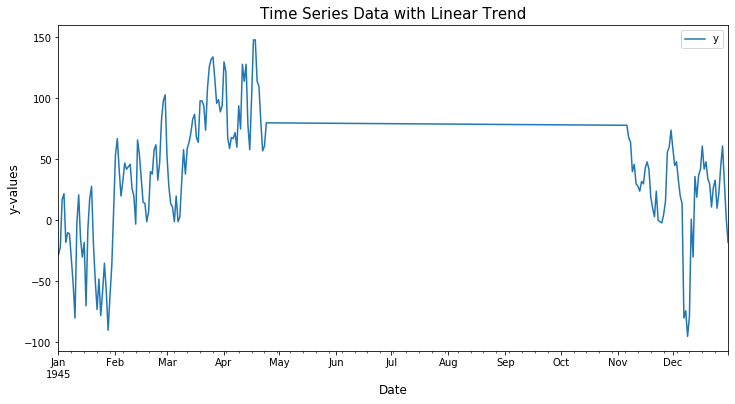

In [44]:
plot_ts(plotter6['1945':'1945-12'], 'Time Series Data with Linear Trend')    # Time Interpolation

## 1) Remove the trend

- Differencing - if the trend is linear
- Second order differencing - if the trend is exponential
- Take the rolling mean and subtract it

### 1.1) Differencing

In [73]:
plotter6['difference']=plotter6['1950-01':'2020-04'].diff()


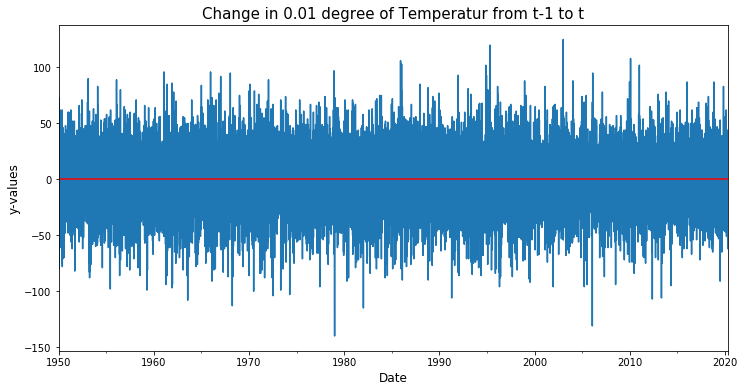

In [74]:
plot_ts(plotter6['difference']['1950-01':'2020-04'], 'Change in 0.01 degree of Temperatur from t-1 to t', plot_hline=True)

In [75]:
plotter6['difference']['1950-01':'2020-04'].mean()

0.00669599408260988

### 1.2) Second order differencing

In [76]:
plotter6['2nddifference'] = plotter6['difference'].diff()
plotter6.head()

,y,difference,2nddifference
x,,,
1876-01-01,22.0,NaN,NaN
1876-01-02,25.0,NaN,NaN
1876-01-03,3.0,NaN,NaN
1876-01-04,-58.0,NaN,NaN
1876-01-05,-98.0,NaN,NaN


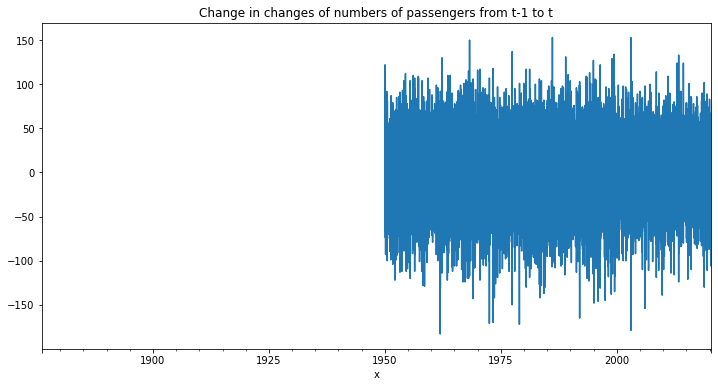

In [77]:
plotter6['2nddifference'].plot(figsize=(12,6), title='Change in changes of numbers of passengers from t-1 to t')

In [78]:
plotter6['2nddifference'].mean()

-0.0010900879856731293

### 1.3) Take the rolling mean and subtract it from the data

In [79]:
plotter6['y'].rolling(12, center=True).mean()

x
1876-01-01   NaN
1876-01-02   NaN
1876-01-03   NaN
1876-01-04   NaN
1876-01-05   NaN
              ..
2020-04-26   NaN
2020-04-27   NaN
2020-04-28   NaN
2020-04-29   NaN
2020-04-30   NaN
Name: y, Length: 52716, dtype: float64

In [62]:
plotter6.head()

,y,difference,2nddifference
x,,,
1876-01-01,22.0,NaN,NaN
1876-01-02,25.0,NaN,NaN
1876-01-03,3.0,NaN,NaN
1876-01-04,-58.0,NaN,NaN
1876-01-05,-98.0,NaN,NaN


In [63]:
# Create the rolling mean of the passengers
plotter6['y'] = plotter['y'].rolling(12, center=True).mean()
plotter6.head(12)

NameError: name 'plotter' is not defined

In [ ]:
plot_ts(plotter6['2010-01':'2011-04'].pct_change(),'Das')  

In [ ]:
plot_ts(plotter6['2010-01':'2011-04'].rolling(12).mean(),'Das')

# Take Aways from the plot
- Extreme Cold in 1978/1979 "Snow Catastrophe in northern Ger"
- Feb. 1956 -30°  Rhein freezes.
- Seasonality

# Decompositation

In [ ]:
import statsmodels.api as sm

In [ ]:
decomposition = sm.tsa.seasonal_decompose(plotter['1945-01':'2011-12'], model ='additive')
fig= decomposition.plot()

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval = 3)
year_format=mdates.DateFormatter("%Y")
month_format=mdates.DateFormatter("%m")
ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which ='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(plotter.index,plotter.TG, c= "blue")
plt.plot(dec)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

print(plot_pacf(plotter))